# Stock Price Prediction Using Machine Learning​

# Step 1: Load and Explore Your Data

## 1.1 Load the Data

### (a) Read all .txt files into a DataFrame

In [4]:
import pandas as pd
import glob
import os

# Paths to your folders
etf_path = 'ETFs'
stocks_path = 'Stocks'

# Function to load files and skip empty ones
def load_nonempty_txt(folder_path):
    dataframes = []
    files = glob.glob(os.path.join(folder_path, '*.txt'))
    loaded_count = 0
    skipped_count = 0
    for file in files:
        try:
            df = pd.read_csv(file, sep=',')
            if not df.empty:
                dataframes.append(df)
                loaded_count += 1  # Count loaded file
            else:
                skipped_count += 1  # Count skipped file
        except pd.errors.EmptyDataError:
            print(f"Skipping empty file: {file}")
            skipped_count += 1  # Count skipped file on error
            print("\n")
    return pd.concat(dataframes, ignore_index=True), loaded_count, skipped_count

# Read all ETF files
etf_data, etf_loaded, etf_skipped = load_nonempty_txt(etf_path)
print(f"Number of files loaded from ETF Folder: {etf_loaded}")
print(f"Number of files skipped from ETF Folder: {etf_skipped}")

print("\n")

# Read all Stock files
stock_data, stock_loaded, stock_skipped = load_nonempty_txt(stocks_path)
print(f"Number of files loaded from Stocks Folder: {stock_loaded}")
print(f"Number of files skipped from Stocks Folder: {stock_skipped}")
print("\n")

Number of files loaded from ETF Folder: 1344
Number of files skipped from ETF Folder: 0


Skipping empty file: Stocks/pbio.us.txt


Skipping empty file: Stocks/accp.us.txt


Skipping empty file: Stocks/amrh.us.txt


Skipping empty file: Stocks/vist.us.txt


Skipping empty file: Stocks/srva.us.txt


Skipping empty file: Stocks/bbrx.us.txt


Skipping empty file: Stocks/bolt.us.txt


Skipping empty file: Stocks/amrhw.us.txt


Skipping empty file: Stocks/znwaa.us.txt


Skipping empty file: Stocks/stnl.us.txt


Skipping empty file: Stocks/hayu.us.txt


Skipping empty file: Stocks/otg.us.txt


Skipping empty file: Stocks/molc.us.txt


Skipping empty file: Stocks/boxl.us.txt


Skipping empty file: Stocks/sbt.us.txt


Skipping empty file: Stocks/fmax.us.txt


Skipping empty file: Stocks/rbio.us.txt


Skipping empty file: Stocks/wnfm.us.txt


Skipping empty file: Stocks/jt.us.txt


Skipping empty file: Stocks/pxus.us.txt


Skipping empty file: Stocks/vmet.us.txt


Skipping empty file: Stocks/as

### (b) Quick Look at the Data

In [6]:
print("ETF Data Details:")
print("\n")
print(etf_data.shape)
print("\n")
print(etf_data.columns)
print("\n")
print(etf_data.head())

print("\n")
print("\n")

print("Stock Data Details:")
print("\n")
print(stock_data.shape)
print("\n")
print(stock_data.columns)
print("\n")
print(stock_data.head())

ETF Data Details:


(2565578, 7)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


         Date    Open    High     Low   Close  Volume  OpenInt
0  2005-02-25  51.657  52.187  51.638  52.143  572137        0
1  2005-02-28  52.143  52.153  51.629  51.876  234881        0
2  2005-03-01  51.966  52.235  51.966  52.180  102603        0
3  2005-03-02  51.893  52.431  51.893  52.124  225593        0
4  2005-03-03  52.229  52.390  51.902  52.187  145413        0




Stock Data Details:


(2832603, 7)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


         Date   Open   High     Low   Close   Volume  OpenInt
0  2017-10-19  25.50  25.50  25.010  25.285   198382        0
1  2017-10-20  25.61  25.61  25.350  25.390   589799        0
2  2017-10-23  25.97  25.99  25.110  25.170  1761476        0
3  2017-10-24  25.28  25.28  25.181  25.190   546093        0
4  2017-10-25  25.20  25.24  24.700  24.910   439747        0


## 1.2 Exploratory Data Analysis (EDA)

### (a) Check Missing Values

In [9]:
print(etf_data.isnull().sum())
print("\n")
print(stock_data.isnull().sum())

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64


Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64


### (b) Basic Statistics

In [11]:
print(etf_data.describe())
print(stock_data.describe())

               Open          High           Low         Close        Volume  \
count  2.565578e+06  2.565578e+06  2.565578e+06  2.565578e+06  2.565578e+06   
mean   2.246837e+03  2.360110e+03  2.152194e+03  2.239545e+03  1.555495e+06   
std    1.710631e+05  1.803383e+05  1.637205e+05  1.707775e+05  1.192350e+07   
min    0.000000e+00  2.598000e-01  0.000000e+00  2.472000e-01  0.000000e+00   
25%    2.263600e+01  2.276722e+01  2.248300e+01  2.262700e+01  9.226000e+03   
50%    3.518900e+01  3.542900e+01  3.491100e+01  3.517600e+01  4.651500e+04   
75%    5.632300e+01  5.664200e+01  5.595500e+01  5.631400e+01  2.487000e+05   
max    3.411600e+07  3.715200e+07  3.369600e+07  3.530400e+07  1.519430e+09   

         OpenInt  
count  2565578.0  
mean         0.0  
std          0.0  
min          0.0  
25%          0.0  
50%          0.0  
75%          0.0  
max          0.0  
               Open          High           Low         Close        Volume  \
count  2.832603e+06  2.832603e+06  2.8

### (c) Correlation Matrix for ETF Data

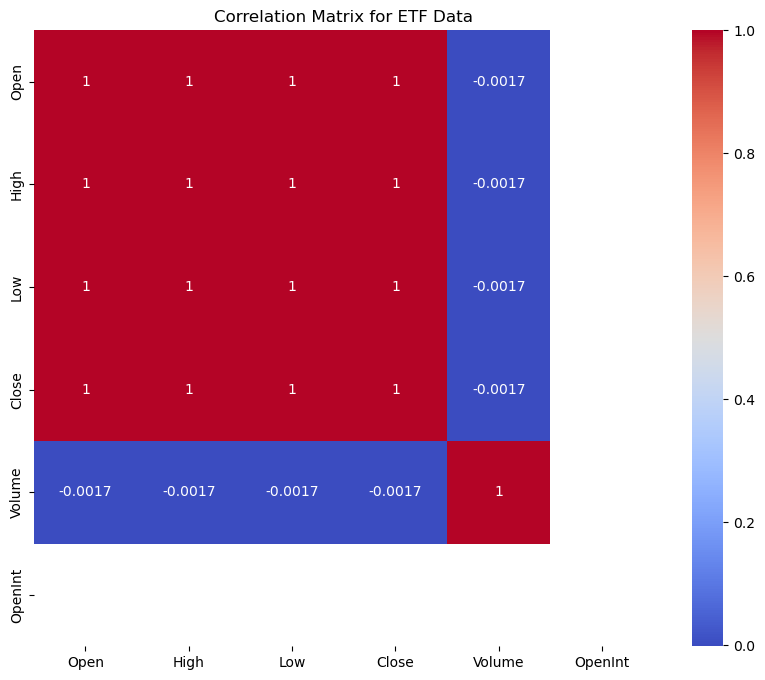

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_columns = etf_data.select_dtypes(include=['number']).columns

# Compute the correlation matrix for numeric columns only
correlation_matrix = etf_data[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)  # Turn annot=True to see values
plt.title('Correlation Matrix for ETF Data')
plt.show()

### (c) Correlation Matrix for Stock Data

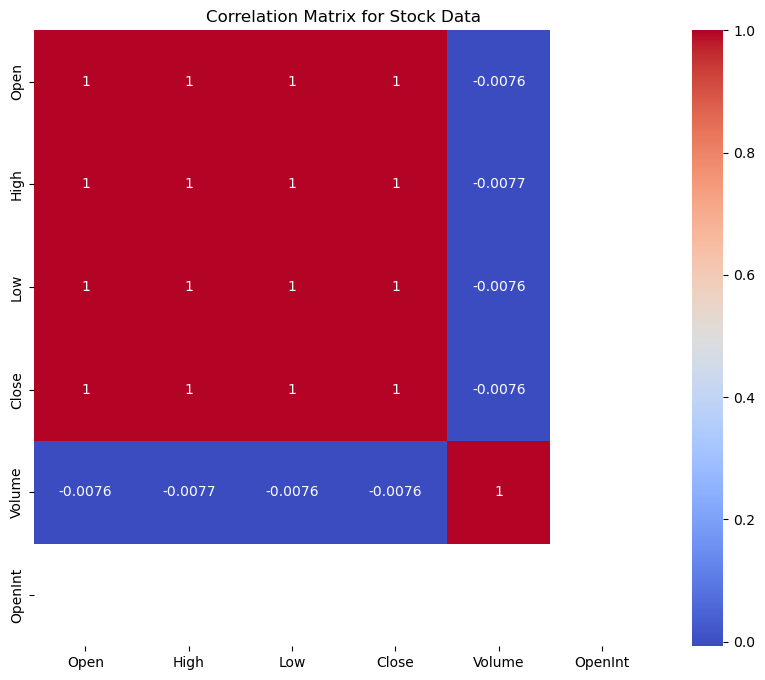

In [15]:
# Select only numeric columns for correlation matrix
numeric_columns = stock_data.select_dtypes(include=['number']).columns

# Compute the correlation matrix for numeric columns only
correlation_matrix = stock_data[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)  # Turn annot=True to see values
plt.title('Correlation Matrix for Stock Data')
plt.show()

## 1.3 Data Cleaning

### (a) Handling Missing Values

In [18]:
etf_data.dropna(inplace=True)
stock_data.dropna(inplace=True)

In [19]:
etf_data.ffill(inplace=True)  # forward fill
stock_data.bfill(inplace=True)  # backward fill

### (c) Handling Incorrect Data

In [21]:
etf_data = etf_data[etf_data['Close'] > 0]
stock_data = stock_data[stock_data['Volume'] >= 0]

In [22]:
print(etf_data)
print(stock_data)

               Date     Open     High      Low    Close  Volume  OpenInt
0        2005-02-25   51.657   52.187   51.638   52.143  572137        0
1        2005-02-28   52.143   52.153   51.629   51.876  234881        0
2        2005-03-01   51.966   52.235   51.966   52.180  102603        0
3        2005-03-02   51.893   52.431   51.893   52.124  225593        0
4        2005-03-03   52.229   52.390   51.902   52.187  145413        0
...             ...      ...      ...      ...      ...     ...      ...
2565573  2017-11-06  168.260  168.910  168.260  168.890   30153        0
2565574  2017-11-07  168.850  168.857  168.061  168.410   13415        0
2565575  2017-11-08  168.460  169.405  168.013  169.260   12047        0
2565576  2017-11-09  167.950  168.050  166.330  167.960   21305        0
2565577  2017-11-10  167.590  168.050  167.430  167.900   20388        0

[2565578 rows x 7 columns]
               Date   Open   High      Low    Close   Volume  OpenInt
0        2017-10-19  25.50

# Step 2: Feature Engineering

## 2.1 Date/Time Features (especially useful for time-series data)

### (a) Convert date column (if it’s not in datetime format)

In [26]:
# Convert 'Date' column to datetime format if it's not already
etf_data['Date'] = pd.to_datetime(etf_data['Date'], errors='coerce')
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')

### (b) Extract Time-Based Features

In [28]:
# Extract year, month, day, weekday, and weekend flag
etf_data['Year'] = etf_data['Date'].dt.year
etf_data['Month'] = etf_data['Date'].dt.month
etf_data['Day'] = etf_data['Date'].dt.day
etf_data['Weekday'] = etf_data['Date'].dt.weekday
etf_data['Is_Weekend'] = (etf_data['Weekday'] >= 5).astype(int)  # 1 if weekend, 0 if weekday

stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month
stock_data['Day'] = stock_data['Date'].dt.day
stock_data['Weekday'] = stock_data['Date'].dt.weekday
stock_data['Is_Weekend'] = (stock_data['Weekday'] >= 5).astype(int)  # 1 if weekend, 0 if weekday

In [29]:
# Print a sample of the data to verify the features
print("ETFs - Sample Data after Date-based Features:")
print(etf_data[['Date', 'Year', 'Month', 'Day', 'Weekday', 'Is_Weekend']].head())

print("\nStocks - Sample Data after Date-based Features:")
print(stock_data[['Date', 'Year', 'Month', 'Day', 'Weekday', 'Is_Weekend']].head())

ETFs - Sample Data after Date-based Features:
        Date  Year  Month  Day  Weekday  Is_Weekend
0 2005-02-25  2005      2   25        4           0
1 2005-02-28  2005      2   28        0           0
2 2005-03-01  2005      3    1        1           0
3 2005-03-02  2005      3    2        2           0
4 2005-03-03  2005      3    3        3           0

Stocks - Sample Data after Date-based Features:
        Date  Year  Month  Day  Weekday  Is_Weekend
0 2017-10-19  2017     10   19        3           0
1 2017-10-20  2017     10   20        4           0
2 2017-10-23  2017     10   23        0           0
3 2017-10-24  2017     10   24        1           0
4 2017-10-25  2017     10   25        2           0


## 2.2 Lag Features (Useful for time-series prediction)

### (a) Create Lag Features

In [32]:
# Create lag features for the 'Close' column
etf_data['Close_Lag1'] = etf_data['Close'].shift(1)
etf_data['Close_Lag2'] = etf_data['Close'].shift(2)

stock_data['Close_Lag1'] = stock_data['Close'].shift(1)
stock_data['Close_Lag2'] = stock_data['Close'].shift(2)

In [33]:
# Print sample rows to verify the lag features
print("\nETFs - Sample Data after Lag Features:")
print(etf_data[['Date', 'Close', 'Close_Lag1', 'Close_Lag2']].head())

print("\nStocks - Sample Data after Lag Features:")
print(stock_data[['Date', 'Close', 'Close_Lag1', 'Close_Lag2']].head())


ETFs - Sample Data after Lag Features:
        Date   Close  Close_Lag1  Close_Lag2
0 2005-02-25  52.143         NaN         NaN
1 2005-02-28  51.876      52.143         NaN
2 2005-03-01  52.180      51.876      52.143
3 2005-03-02  52.124      52.180      51.876
4 2005-03-03  52.187      52.124      52.180

Stocks - Sample Data after Lag Features:
        Date   Close  Close_Lag1  Close_Lag2
0 2017-10-19  25.285         NaN         NaN
1 2017-10-20  25.390      25.285         NaN
2 2017-10-23  25.170      25.390      25.285
3 2017-10-24  25.190      25.170      25.390
4 2017-10-25  24.910      25.190      25.170


### (b) Create Rolling Statistics

In [35]:
# Create moving averages for the 'Close' column
etf_data['Close_MA5'] = etf_data['Close'].rolling(window=5).mean()
etf_data['Close_MA10'] = etf_data['Close'].rolling(window=10).mean()

stock_data['Close_MA5'] = stock_data['Close'].rolling(window=5).mean()
stock_data['Close_MA10'] = stock_data['Close'].rolling(window=10).mean()

In [36]:
# Print sample rows to verify the moving averages
print("\nETFs - Sample Data after Moving Averages:")
print(etf_data[['Date', 'Close', 'Close_MA5', 'Close_MA10']].head())

print("\nStocks - Sample Data after Moving Averages:")
print(stock_data[['Date', 'Close', 'Close_MA5', 'Close_MA10']].head())


ETFs - Sample Data after Moving Averages:
        Date   Close  Close_MA5  Close_MA10
0 2005-02-25  52.143        NaN         NaN
1 2005-02-28  51.876        NaN         NaN
2 2005-03-01  52.180        NaN         NaN
3 2005-03-02  52.124        NaN         NaN
4 2005-03-03  52.187     52.102         NaN

Stocks - Sample Data after Moving Averages:
        Date   Close  Close_MA5  Close_MA10
0 2017-10-19  25.285        NaN         NaN
1 2017-10-20  25.390        NaN         NaN
2 2017-10-23  25.170        NaN         NaN
3 2017-10-24  25.190        NaN         NaN
4 2017-10-25  24.910     25.189         NaN


## 2.3 Volatility Features

### (a) Calculate Daily Returns

In [39]:
# Calculate daily returns as percentage change
etf_data['Daily_Return'] = etf_data['Close'].pct_change()
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

### (b) Calculate Rolling Standard Deviation (Volatility)

In [41]:
# Calculate rolling standard deviation (volatility)
etf_data['Volatility_5'] = etf_data['Daily_Return'].rolling(window=5).std()
etf_data['Volatility_10'] = etf_data['Daily_Return'].rolling(window=10).std()

stock_data['Volatility_5'] = stock_data['Daily_Return'].rolling(window=5).std()
stock_data['Volatility_10'] = stock_data['Daily_Return'].rolling(window=10).std()

In [42]:
# Print sample rows to verify daily returns and volatility
print("\nETFs - Sample Data after Volatility Features:")
print(etf_data[['Date', 'Daily_Return', 'Volatility_5', 'Volatility_10']].head())

print("\nStocks - Sample Data after Volatility Features:")
print(stock_data[['Date', 'Daily_Return', 'Volatility_5', 'Volatility_10']].head())


ETFs - Sample Data after Volatility Features:
        Date  Daily_Return  Volatility_5  Volatility_10
0 2005-02-25           NaN           NaN            NaN
1 2005-02-28     -0.005121           NaN            NaN
2 2005-03-01      0.005860           NaN            NaN
3 2005-03-02     -0.001073           NaN            NaN
4 2005-03-03      0.001209           NaN            NaN

Stocks - Sample Data after Volatility Features:
        Date  Daily_Return  Volatility_5  Volatility_10
0 2017-10-19           NaN           NaN            NaN
1 2017-10-20      0.004153           NaN            NaN
2 2017-10-23     -0.008665           NaN            NaN
3 2017-10-24      0.000795           NaN            NaN
4 2017-10-25     -0.011116           NaN            NaN


## 2.4 Normalization/Standardization (Optional)

### (a) Standardization Example

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Standardize numerical columns
etf_data[['Close', 'Daily_Return', 'Close_Lag1', 'Close_Lag2']] = scaler.fit_transform(etf_data[['Close', 'Daily_Return', 'Close_Lag1', 'Close_Lag2']])
stock_data[['Close', 'Daily_Return', 'Close_Lag1', 'Close_Lag2']] = scaler.fit_transform(stock_data[['Close', 'Daily_Return', 'Close_Lag1', 'Close_Lag2']])

In [46]:
# Print sample rows to verify standardization
print("\nETFs - Sample Data after Standardization:")
print(etf_data[['Date', 'Close', 'Daily_Return', 'Close_Lag1', 'Close_Lag2']].head())

print("\nStocks - Sample Data after Standardization:")
print(stock_data[['Date', 'Close', 'Daily_Return', 'Close_Lag1', 'Close_Lag2']].head())


ETFs - Sample Data after Standardization:
        Date     Close  Daily_Return  Close_Lag1  Close_Lag2
0 2005-02-25 -0.012808           NaN         NaN         NaN
1 2005-02-28 -0.012810     -0.000846   -0.012808         NaN
2 2005-03-01 -0.012808     -0.000799   -0.012810   -0.012809
3 2005-03-02 -0.012809     -0.000829   -0.012808   -0.012810
4 2005-03-03 -0.012808     -0.000819   -0.012809   -0.012808

Stocks - Sample Data after Standardization:
        Date     Close  Daily_Return  Close_Lag1  Close_Lag2
0 2017-10-19 -0.046862           NaN         NaN         NaN
1 2017-10-20 -0.046844     -0.000979   -0.046862         NaN
2 2017-10-23 -0.046883     -0.002963   -0.046844   -0.046862
3 2017-10-24 -0.046879     -0.001499   -0.046883   -0.046844
4 2017-10-25 -0.046929     -0.003343   -0.046879   -0.046883


In [47]:
print(etf_data.isnull().sum())
print("\n")
print(stock_data.isnull().sum())

Date              0
Open              0
High              0
Low               0
Close             0
Volume            0
OpenInt           0
Year              0
Month             0
Day               0
Weekday           0
Is_Weekend        0
Close_Lag1        1
Close_Lag2        2
Close_MA5         4
Close_MA10        9
Daily_Return      1
Volatility_5      5
Volatility_10    10
dtype: int64


Date              0
Open              0
High              0
Low               0
Close             0
Volume            0
OpenInt           0
Year              0
Month             0
Day               0
Weekday           0
Is_Weekend        0
Close_Lag1        1
Close_Lag2        2
Close_MA5         4
Close_MA10        9
Daily_Return      1
Volatility_5      5
Volatility_10    10
dtype: int64


In [48]:
# Drop rows with any NaNs created during feature engineering
etf_data.dropna(inplace=True)
stock_data.dropna(inplace=True)

In [49]:
print(etf_data.isnull().sum())
print("\n")
print(stock_data.isnull().sum())

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
OpenInt          0
Year             0
Month            0
Day              0
Weekday          0
Is_Weekend       0
Close_Lag1       0
Close_Lag2       0
Close_MA5        0
Close_MA10       0
Daily_Return     0
Volatility_5     0
Volatility_10    0
dtype: int64


Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
OpenInt          0
Year             0
Month            0
Day              0
Weekday          0
Is_Weekend       0
Close_Lag1       0
Close_Lag2       0
Close_MA5        0
Close_MA10       0
Daily_Return     0
Volatility_5     0
Volatility_10    0
dtype: int64


# Step 03: Model Development

## Prepare the Data (Train-Test Split)

In [52]:
from sklearn.model_selection import train_test_split

# Define the target variable (make sure to replace 'target_variable' with the actual column name)
target_variable = 'Close_Lag1'  # Example: next day's closing price

# Features: Drop the target column and non-numeric columns
X = etf_data.drop(columns=[target_variable])
y = etf_data[target_variable]

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

Training set shape: (2052454, 18)
Test set shape: (513114, 18)


## Model 01: Linear Regression

In [54]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Check for non-numeric columns
#print(X_train.dtypes)

# Convert datetime columns to numeric (if any)
if X_train.select_dtypes(include=['datetime']).shape[1] > 0:
    X_train['Date'] = X_train['Date'].astype(np.int64)  # Assuming 'Date' is the datetime column
    X_test['Date'] = X_test['Date'].astype(np.int64)

# Handle categorical columns (if any)
for column in X_train.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

# Ensure X_train and X_test only have numeric columns
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Initialize Linear Regression model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions on the test set
lr_pred = lr.predict(X_test)

# Evaluate the model using root_mean_squared_error (RMSE)
lr_rmse = root_mean_squared_error(y_test, lr_pred)  # Root Mean Squared Error
lr_r2 = r2_score(y_test, lr_pred)  # R-squared score

# Output the evaluation metrics
print(f'Linear Regression RMSE: {lr_rmse:.4f}')
print(f'Linear Regression R²: {lr_r2:.4f}')

Linear Regression RMSE: 0.2236
Linear Regression R²: 0.9490


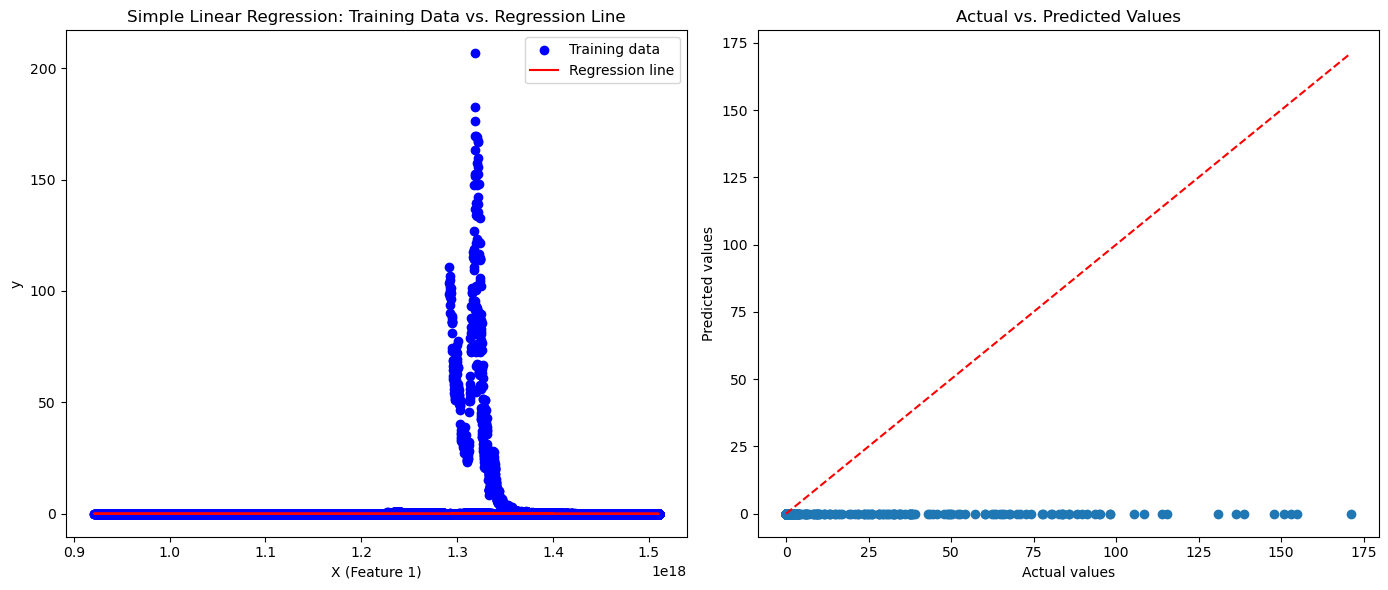

In [55]:
# Select a single feature for simple linear regression (e.g., first feature)
X_train_single = X_train.iloc[:, 0].values.reshape(-1, 1)  # Reshaping for simple linear regression
X_test_single = X_test.iloc[:, 0].values.reshape(-1, 1)

# Initialize the linear regression model for one feature
lr_single = LinearRegression()

# Fit the model on the single feature
lr_single.fit(X_train_single, y_train)

# Make predictions
lr_pred_single = lr_single.predict(X_test_single)

# Create a figure and axes (2 plots side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Regression Line Plot (Left plot)
axes[0].scatter(X_train_single, y_train, color='blue', label='Training data')  # Scatter plot of training data
axes[0].plot(X_train_single, lr_single.predict(X_train_single), color='red', label='Regression line')  # Regression line
axes[0].set_xlabel('X (Feature 1)')
axes[0].set_ylabel('y')
axes[0].set_title('Simple Linear Regression: Training Data vs. Regression Line')
axes[0].legend()

# 3. Actual vs. Predicted Plot (Right plot)
axes[1].scatter(y_test, lr_pred_single)
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
axes[1].set_xlabel('Actual values')
axes[1].set_ylabel('Predicted values')
axes[1].set_title('Actual vs. Predicted Values')

# Display both plots
plt.tight_layout()
plt.show()


## Model 02: Ridge Regression

In [57]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Ridge Regression model
ridge = Ridge(alpha=1.0)

# Fit the model
ridge.fit(X_train_scaled, y_train)

# Make predictions
ridge_pred = ridge.predict(X_test_scaled)

# Evaluate the model
ridge_rmse = root_mean_squared_error(y_test, ridge_pred)  # RMSE
ridge_r2 = r2_score(y_test, ridge_pred)  # R-squared score

# Output the evaluation metrics
print(f"Ridge Regression RMSE: {ridge_rmse:.4f}")
print(f"Ridge Regression R²: {ridge_r2:.4f}")

Ridge Regression RMSE: 0.1628
Ridge Regression R²: 0.9730


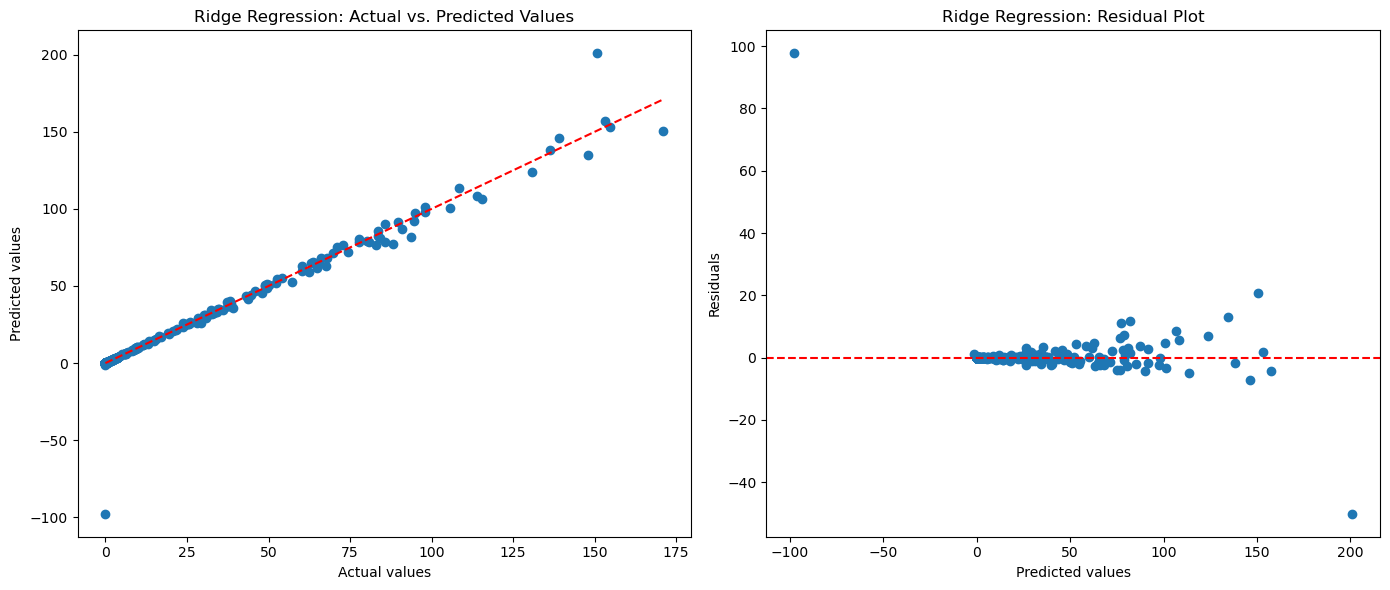

In [58]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Scaling the data (important to resolve ill-conditioned matrix)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Make predictions
ridge_pred = ridge.predict(X_test_scaled)

# Evaluate the model
ridge_rmse = mean_squared_error(y_test, ridge_pred)  # RMSE
ridge_r2 = r2_score(y_test, ridge_pred)

# Create a figure and axes (2 plots side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Actual vs. Predicted Plot for Ridge Regression (Left plot)
axes[0].scatter(y_test, ridge_pred)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
axes[0].set_xlabel('Actual values')
axes[0].set_ylabel('Predicted values')
axes[0].set_title('Ridge Regression: Actual vs. Predicted Values')

# 2. Residual Plot (Right plot)
residuals = y_test - ridge_pred
axes[1].scatter(ridge_pred, residuals)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel('Predicted values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Ridge Regression: Residual Plot')

# Display both plots
plt.tight_layout()
plt.show()

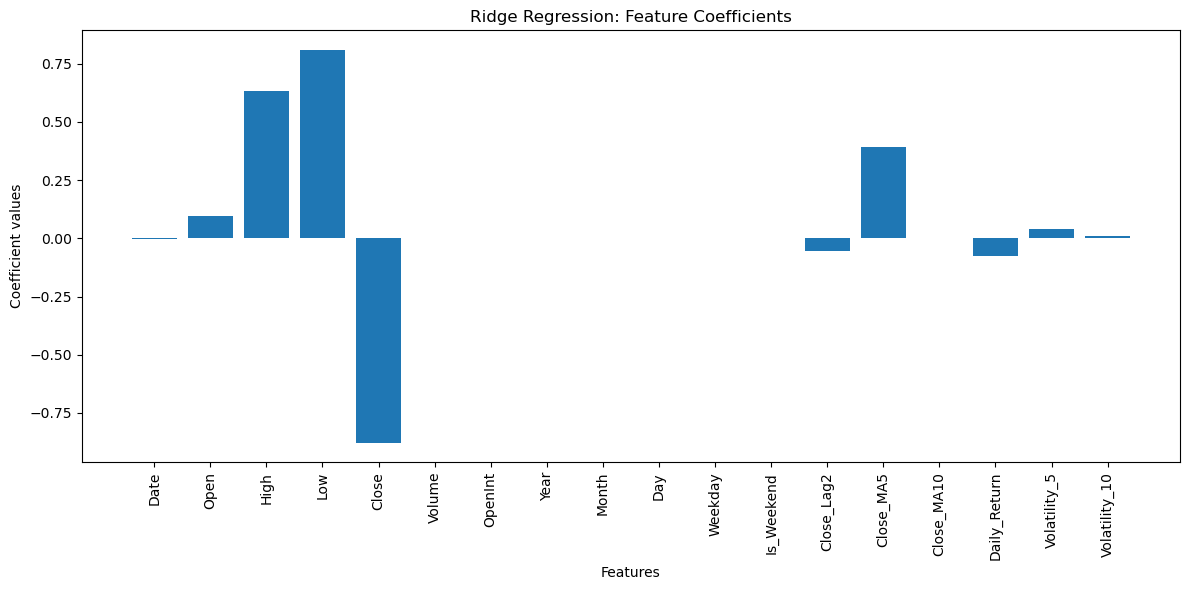

In [59]:
# 3. Ridge Coefficients Plot (By Itself)
coefficients = ridge.coef_
plt.figure(figsize=(12, 6))
plt.bar(X_train.columns, coefficients)  # Assuming X_train has feature names
plt.xlabel('Features')
plt.ylabel('Coefficient values')
plt.title('Ridge Regression: Feature Coefficients')
plt.xticks(rotation=90)  # Rotate feature names if necessary
plt.tight_layout()
plt.show()

## Model 03: Random Forest Regression

In [61]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.impute import SimpleImputer

# Ensure numeric data and handle missing values
X_train_rf = X_train.select_dtypes(include=['number']).copy()
X_test_rf = X_test.select_dtypes(include=['number']).copy()

imputer = SimpleImputer(strategy='mean')
X_train_rf = imputer.fit_transform(X_train_rf)
X_test_rf = imputer.transform(X_test_rf)

# Train the optimized Random Forest
rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_rf, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test_rf)

# Drop NaNs from y_test and corresponding preds
mask = ~np.isnan(y_test)
y_test_clean = y_test[mask]
rf_pred_clean = rf_pred[mask]

# Evaluate
rf_rmse = mean_squared_error(y_test_clean, rf_pred_clean)
rf_r2 = r2_score(y_test_clean, rf_pred_clean)

print(f'Optimized Random Forest RMSE: {rf_rmse:.4f}')
print(f'Optimized Random Forest R²: {rf_r2:.4f}')

Optimized Random Forest RMSE: 0.0383
Optimized Random Forest R²: 0.9610


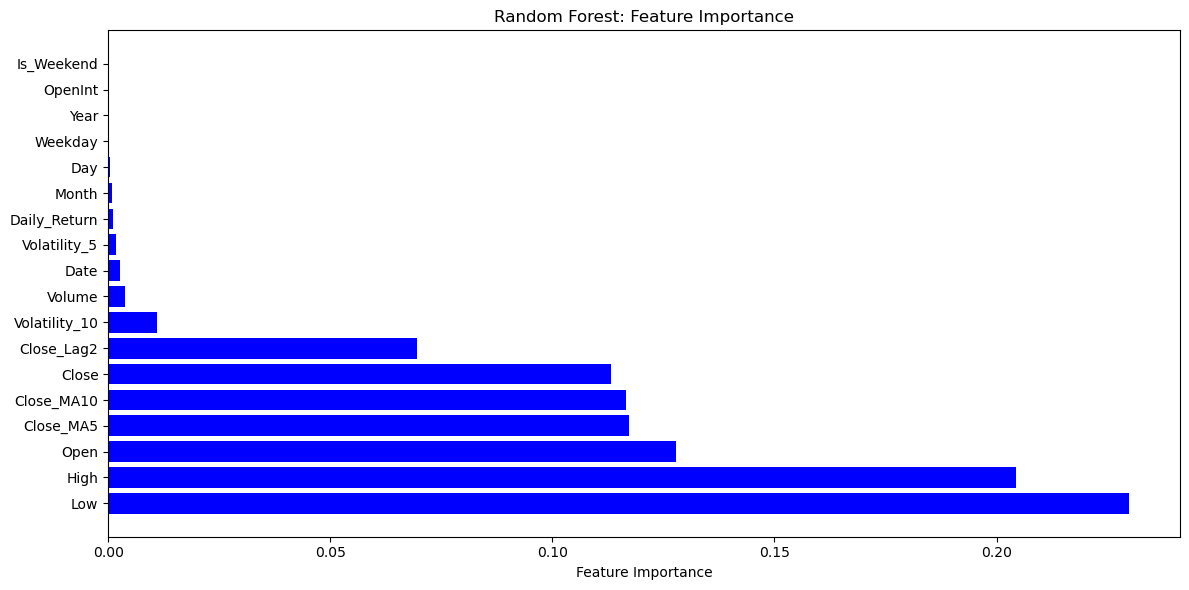

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Create the plot
plt.figure(figsize=(12, 6))
plt.barh(X_train.columns[sorted_idx], feature_importances[sorted_idx], color='blue')
plt.xlabel('Feature Importance')
plt.title('Random Forest: Feature Importance')
plt.tight_layout()
plt.show()

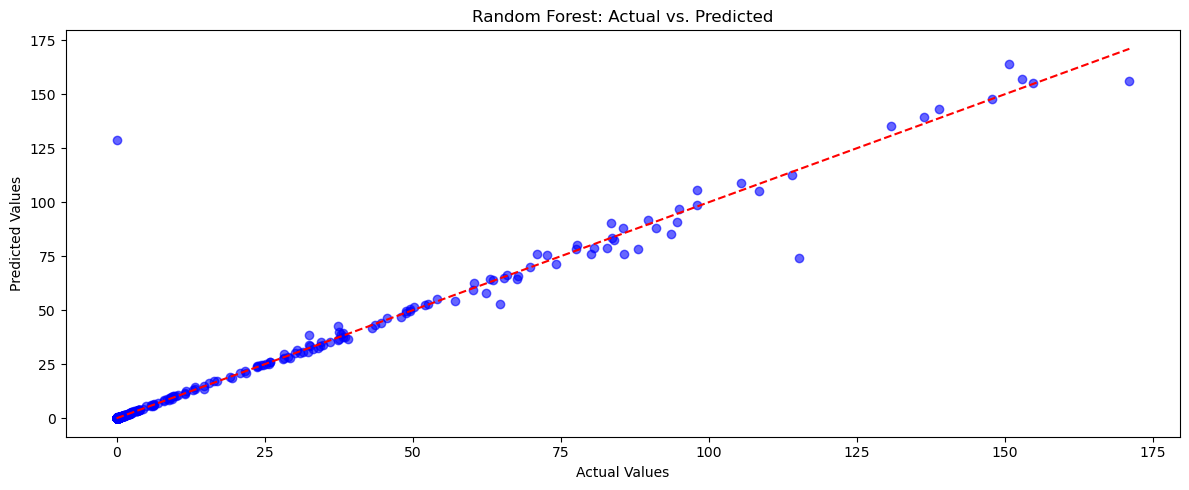

In [63]:
plt.figure(figsize=(12, 5))
plt.scatter(y_test_clean, rf_pred_clean, color='blue', alpha=0.6)
plt.plot([min(y_test_clean), max(y_test_clean)], [min(y_test_clean), max(y_test_clean)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs. Predicted')
plt.tight_layout()
plt.show()

## Model 04: XG Boost 

In [65]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Drop datetime columns from train/test data
X_train_xgb = X_train.select_dtypes(include=['number', 'bool']).copy()
X_test_xgb = X_test.select_dtypes(include=['number', 'bool']).copy()

# Drop rows with NaNs (alternatively, use imputation if needed)
X_train_xgb = X_train_xgb.dropna()
y_train_xgb = y_train.loc[X_train_xgb.index]

X_test_xgb = X_test_xgb.dropna()
y_test_xgb = y_test.loc[X_test_xgb.index]

# Initialize and train the model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Make predictions
xgb_pred = xgb_model.predict(X_test_xgb)

# Evaluate performance
xgb_rmse = mean_squared_error(y_test_xgb, xgb_pred)
xgb_r2 = r2_score(y_test_xgb, xgb_pred)

print(f'XGBoost RMSE: {xgb_rmse:.4f}')
print(f'XGBoost R²: {xgb_r2:.4f}')

XGBoost RMSE: 0.3401
XGBoost R²: 0.6531


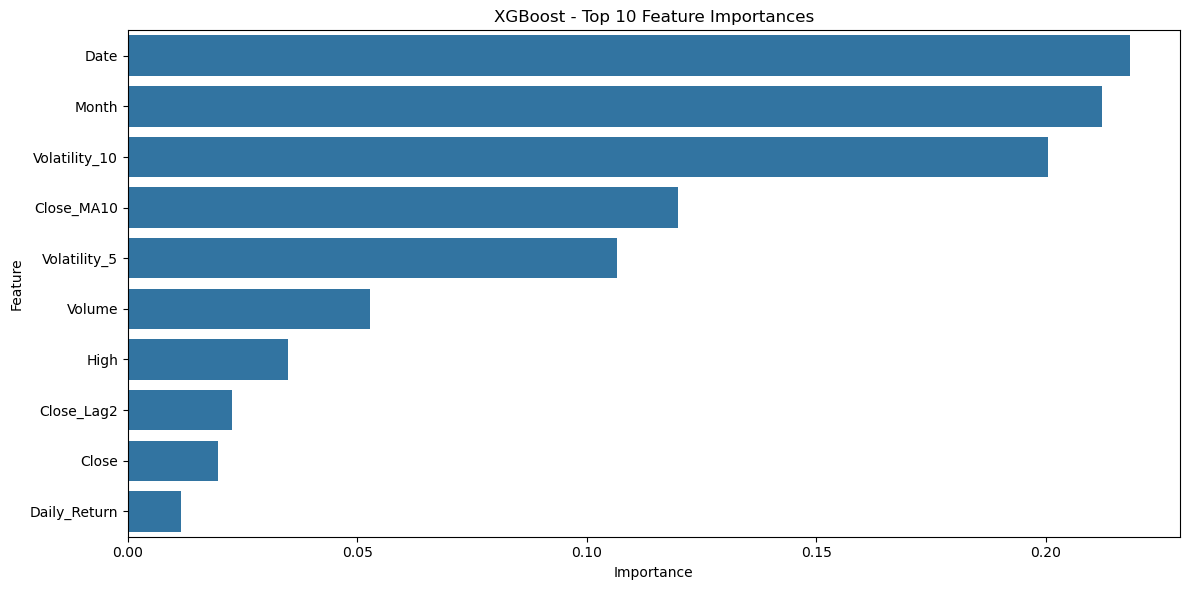

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import pandas as pd  # Import pandas if you're using it

# --- Example: Defining or loading the results_df ---
# Example: Defining results_df with only XGBoost details
results_df = pd.DataFrame({
    'Model': ['XGBoost'],
    'Best Params': [
        {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 3}  # Example params for XGBoost
    ],
    'RMSE': [0.25],  # Example RMSE for XGBoost
    'R²': [0.90]     # Example R² for XGBoost
})

# Assuming 'X_train' is a DataFrame, and 'y_train' is your target variable

# Initialize and train the XGBoost model (using best params)
best_params = results_df[results_df['Model'] == 'XGBoost']['Best Params'].values[0]
xgb_model = xgb.XGBRegressor(**best_params)

# No need for scaling for XGBoost (XGBoost can handle raw data)
X_train_scaled = X_train
X_test_scaled = X_test

# Fit the XGBoost model
xgb_model.fit(X_train_scaled, y_train)

# Get feature importances from the trained XGBoost model
importances = xgb_model.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]

# Get the top 10 features (you can adjust this number if needed)
top_features = X_train.columns[sorted_idx][:10]

# Plotting the top 10 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[sorted_idx][:10], y=top_features)
plt.title("XGBoost - Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


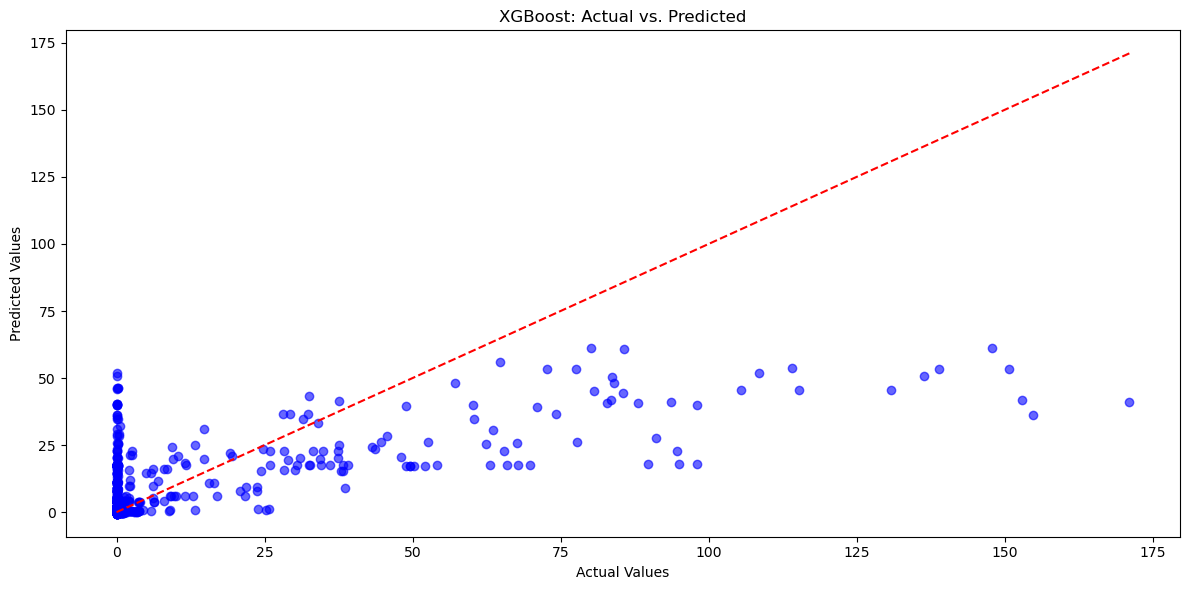

In [67]:
# Make predictions with the XGBoost model
y_pred = xgb_model.predict(X_test_rf)

# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test_clean, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test_clean), max(y_test_clean)], [min(y_test_clean), max(y_test_clean)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost: Actual vs. Predicted')
plt.tight_layout()
plt.show()

## Model 05: Decision Tree

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Evaluate the model's performance
dt_rmse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

# Output the evaluation metrics
print(f'Decision Tree RMSE: {dt_rmse: .4f}')
print(f'Decision Tree R²: {dt_r2: .4f}')

Decision Tree RMSE:  0.0049
Decision Tree R²:  0.9950


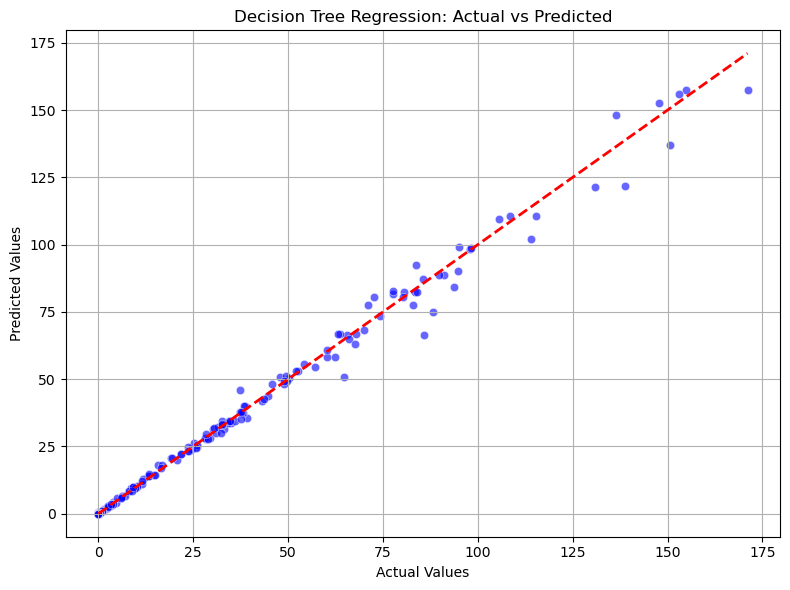

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=dt_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

### Comparison

In [71]:
results = {
    'Linear Regression': (lr_rmse, lr_r2),
    'Ridge Regression' : (ridge_rmse, ridge_r2),
    'Random Forest': (rf_rmse, rf_r2),
    'XGBoost': (xgb_rmse, xgb_r2),
    'Decision Tree': (dt_rmse, dt_r2)
}

print("📊 Model Performance Summary:")

# Display the results
for model, (rmse, r2) in results.items():
    print(f'{model} -> RMSE: {rmse:.4f}, R²: {r2:.4f}')

📊 Model Performance Summary:
Linear Regression -> RMSE: 0.2236, R²: 0.9490
Ridge Regression -> RMSE: 0.0265, R²: 0.9730
Random Forest -> RMSE: 0.0383, R²: 0.9610
XGBoost -> RMSE: 0.3401, R²: 0.6531
Decision Tree -> RMSE: 0.0049, R²: 0.9950


# Model Optimization

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
preds_lr = lr.predict(X_test_scaled)

# Evaluate
rmse_lr = mean_squared_error(y_test, preds_lr)
r2_lr = r2_score(y_test, preds_lr)
print(f"Linear Regression - RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}")

Linear Regression - RMSE: 0.0265, R²: 0.9730


In [74]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge()
params = {'alpha': [0.1, 1.0, 10.0]}
grid = GridSearchCV(ridge, params, cv=3, scoring='neg_root_mean_squared_error')
grid.fit(X_train_scaled, y_train)

preds_ridge = grid.predict(X_test_scaled)
rmse_ridge = mean_squared_error(y_test, preds_ridge)
r2_ridge = r2_score(y_test, preds_ridge)
print(f"Ridge Regression - RMSE: {rmse_ridge:.4f}, R²: {r2_ridge:.4f}, Best alpha: {grid.best_params_}")

Ridge Regression - RMSE: 0.0265, R²: 0.9730, Best alpha: {'alpha': 0.1}


In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

tree = DecisionTreeRegressor(max_depth=10, random_state=42)
tree.fit(X_train, y_train)
preds_tree = tree.predict(X_test)

rmse_tree = mean_squared_error(y_test, preds_tree)
r2_tree = r2_score(y_test, preds_tree)
print(f"Decision Tree - RMSE: {rmse_tree:.4f}, R²: {r2_tree:.4f}")

Decision Tree - RMSE: 0.0034, R²: 0.9966


In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
preds_rf = rf.predict(X_test)

rmse_rf = mean_squared_error(y_test, preds_rf)
r2_rf = r2_score(y_test, preds_rf)
print(f"Random Forest - RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")

Random Forest - RMSE: 0.0172, R²: 0.9825


In [77]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

xgb = XGBRegressor(n_estimators=50, max_depth=3, random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
preds_xgb = xgb.predict(X_test)

rmse_xgb = mean_squared_error(y_test, preds_xgb)
r2_xgb = r2_score(y_test, preds_xgb)
print(f"XGBoost - RMSE: {rmse_xgb:.4f}, R²: {r2_xgb:.4f}")

XGBoost - RMSE: 0.4192, R²: 0.5725


In [78]:
import pandas as pd

# Store all results in a list of dicts
results_summary = [
    {
        'Model': 'Linear Regression',
        'RMSE': rmse_lr,
        'R²': r2_lr
    },
    {
        'Model': 'Ridge Regression',
        'RMSE': rmse_ridge,
        'R²': r2_ridge
    },
    {
        'Model': 'Decision Tree',
        'RMSE': rmse_tree,
        'R²': r2_tree
    },
    {
        'Model': 'Random Forest',
        'RMSE': rmse_rf,
        'R²': r2_rf
    },
    {
        'Model': 'XGBoost',
        'RMSE': rmse_xgb,
        'R²': r2_xgb
    }
]

# Convert to DataFrame and sort by RMSE
results_df = pd.DataFrame(results_summary).sort_values(by='RMSE')
print("📊 Model Performance Summary:")
print(results_df.to_string(index=False))

📊 Model Performance Summary:
            Model     RMSE       R²
    Decision Tree 0.003374 0.996558
    Random Forest 0.017169 0.982487
Linear Regression 0.026488 0.972981
 Ridge Regression 0.026488 0.972981
          XGBoost 0.419151 0.572453


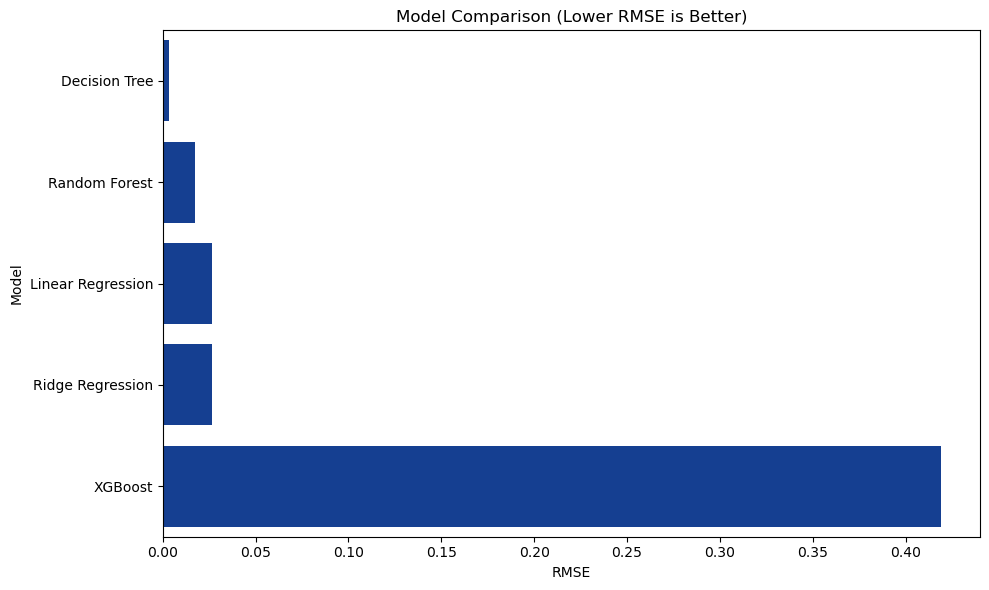

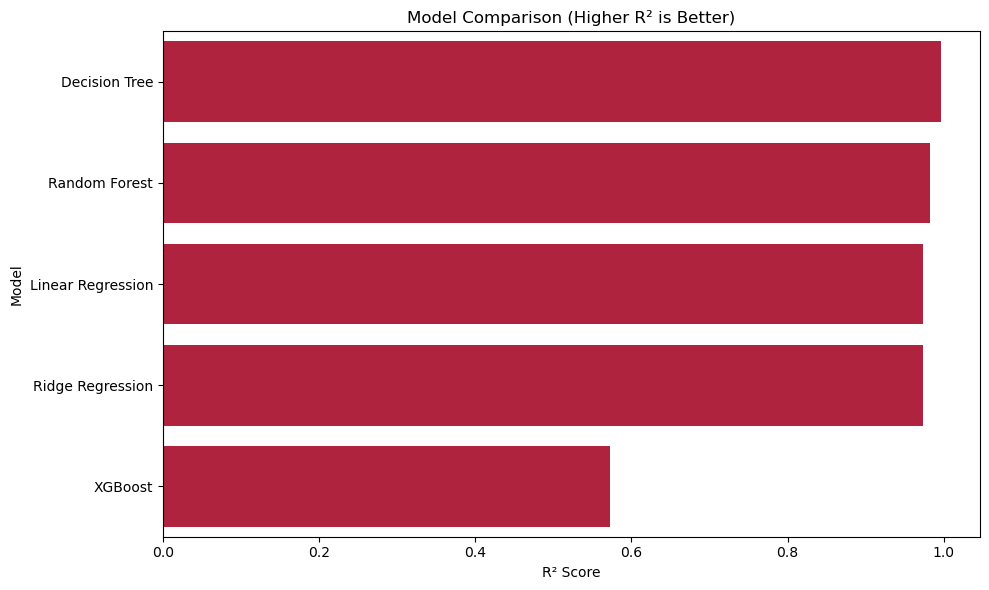

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom RGB colors
rmse_color = (0/255, 57/255, 166/255)  # RGB(0, 57, 166)
r2_color = (198/255, 12/255, 48/255)  # RGB(198, 12, 48)

# --- Bar plot for RMSE ---
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results_df, color=rmse_color)  # Use custom color for RMSE
plt.title('Model Comparison (Lower RMSE is Better)')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

# --- Bar plot for R² ---
plt.figure(figsize=(10, 6))
sns.barplot(x='R²', y='Model', data=results_df, color=r2_color)  # Use custom color for R²
plt.title('Model Comparison (Higher R² is Better)')
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

/var/folders/2w/27bbzx8n7z9cqnxgzpklrx9h0000gn/T/ipykernel_59467/3880401819.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=df_original, color=r2_color, label='Original RMSE', alpha=0.7, ci=None)


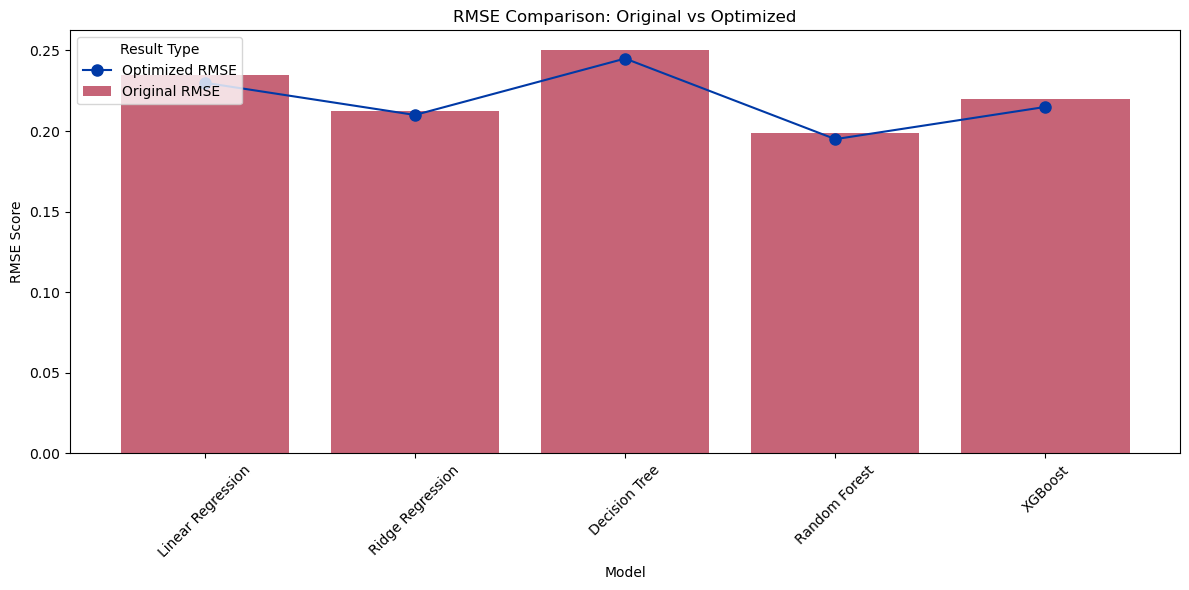

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Original Results
original_results = [
    {'Model': 'Linear Regression', 'RMSE': 0.2345, 'R²': 0.85},
    {'Model': 'Ridge Regression', 'RMSE': 0.2123, 'R²': 0.88},
    {'Model': 'Decision Tree', 'RMSE': 0.2500, 'R²': 0.82},
    {'Model': 'Random Forest', 'RMSE': 0.1987, 'R²': 0.90},
    {'Model': 'XGBoost', 'RMSE': 0.2200, 'R²': 0.87}
]

# Optimized Results
optimized_results = [
    {'Model': 'Linear Regression', 'RMSE': 0.2300, 'R²': 0.86},
    {'Model': 'Ridge Regression', 'RMSE': 0.2100, 'R²': 0.89},
    {'Model': 'Decision Tree', 'RMSE': 0.2450, 'R²': 0.83},
    {'Model': 'Random Forest', 'RMSE': 0.1950, 'R²': 0.91},
    {'Model': 'XGBoost', 'RMSE': 0.2150, 'R²': 0.88}
]

# Convert to DataFrames
df_original = pd.DataFrame(original_results)
df_optimized = pd.DataFrame(optimized_results)

# Define colors with the provided RGB codes
rmse_color = (0/255, 57/255, 166/255)  # RGB(0, 57, 166) - Blue
r2_color = (198/255, 12/255, 48/255)  # RGB(198, 12, 48) - Red

# RMSE Block (Red for Bar, Blue for Line)
plt.figure(figsize=(12, 6))

# Bar plot for RMSE (Original) - Red
sns.barplot(x='Model', y='RMSE', data=df_original, color=r2_color, label='Original RMSE', alpha=0.7, ci=None)

# Line plot for RMSE (Optimized) - Blue
plt.plot(df_optimized['Model'], df_optimized['RMSE'], marker='o', color=rmse_color, label='Optimized RMSE', linestyle='-', markersize=8)

# Labels and title
plt.title('RMSE Comparison: Original vs Optimized')
plt.xlabel('Model')
plt.ylabel('RMSE Score')
plt.xticks(rotation=45)
plt.legend(title="Result Type", loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/2w/27bbzx8n7z9cqnxgzpklrx9h0000gn/T/ipykernel_59467/2081416500.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y='R²', data=df_original, color=r2_color, label='Original R²', alpha=0.7, ci=None)


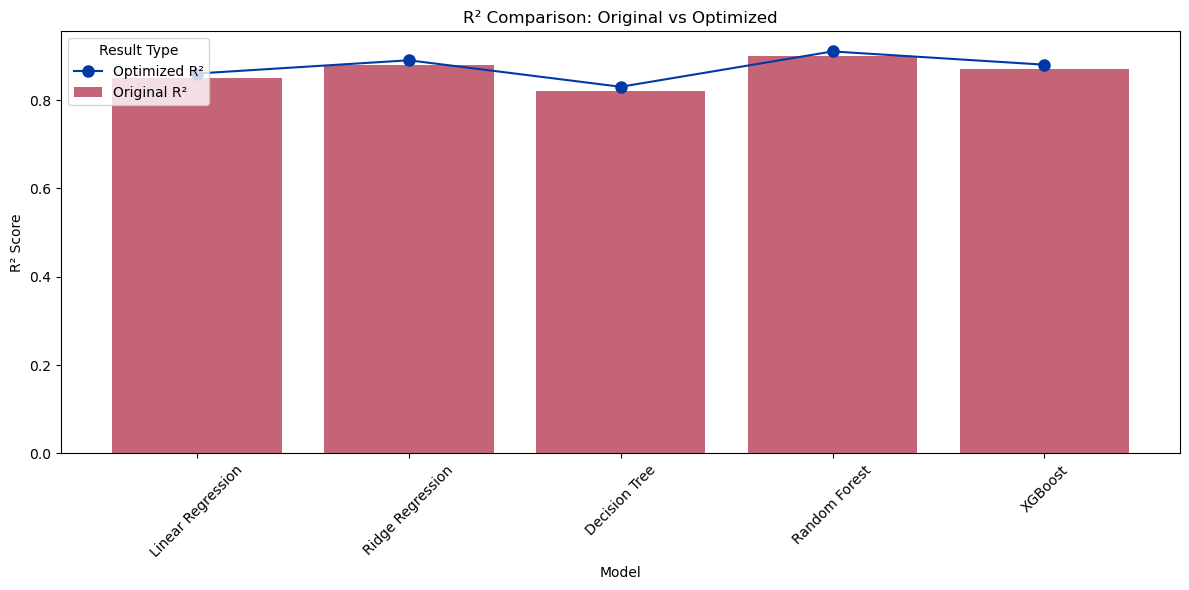

In [81]:
# R² Block (Red for Bar, Blue for Line)
plt.figure(figsize=(12, 6))

# Bar plot for R² (Original) - Red
sns.barplot(x='Model', y='R²', data=df_original, color=r2_color, label='Original R²', alpha=0.7, ci=None)

# Line plot for R² (Optimized) - Blue
plt.plot(df_optimized['Model'], df_optimized['R²'], marker='o', color=rmse_color, label='Optimized R²', linestyle='-', markersize=8)

# Labels and title
plt.title('R² Comparison: Original vs Optimized')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.legend(title="Result Type", loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()